# Predicting Salary of Adults with ML

#### Problem
+ Prediction task is to determine whether a person makes over 50K a year.
+ Source:https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score

## Loading the Dataset

In [3]:
column_names = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","class"]

In [5]:
df = pd.read_csv("adult_salary_data.csv")

In [6]:
df.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Data Exploratory

In [7]:
df.columns

Index(['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education-num', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'class'],
      dtype='object')

In [8]:
df.shape

(32561, 16)

In [10]:
df.dtypes

Unnamed: 0         int64
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

In [14]:
#Need to Convert To Numerical Values/Cat
df.dtypes[df.dtypes == 'object']

workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
native-country    object
class             object
dtype: object

In [15]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [16]:
# d = {ni: indi for indi, ni in enumerate(set(names))}
d = {v: k for k, v in enumerate(set(df['workclass'].unique()))}

In [17]:
d

{' Self-emp-inc': 0,
 ' State-gov': 1,
 ' ?': 2,
 ' Private': 3,
 ' Never-worked': 4,
 ' Local-gov': 5,
 ' Federal-gov': 6,
 ' Self-emp-not-inc': 7,
 ' Without-pay': 8}

In [18]:
# Function to Assign Numbers to Unique Values
def generate_dict(data):
    my_dict = {v: k for k, v in enumerate(set(data))}
    return my_dict

In [19]:
generate_dict(df['education'].unique())

{' 7th-8th': 0,
 ' 1st-4th': 1,
 ' Doctorate': 2,
 ' Assoc-voc': 3,
 ' 12th': 4,
 ' Preschool': 5,
 ' HS-grad': 6,
 ' Masters': 7,
 ' Bachelors': 8,
 ' Some-college': 9,
 ' 11th': 10,
 ' Assoc-acdm': 11,
 ' 5th-6th': 12,
 ' Prof-school': 13,
 ' 10th': 14,
 ' 9th': 15}

In [20]:
obj_list = ["workclass","education","marital-status ","occupation","relationship","race ","sex ","native-country","class"]
obj_names = ["d_workclass","d_education","d_marital-status ","d_occupation","d_relationship","d_race ","d_sex ","d_native-country","d_class"]
for i,j in zip(obj_names,obj_list):
    print('{} = generate_dict(df["{}"].unique())'.format(i,j))

d_workclass = generate_dict(df["workclass"].unique())
d_education = generate_dict(df["education"].unique())
d_marital-status  = generate_dict(df["marital-status "].unique())
d_occupation = generate_dict(df["occupation"].unique())
d_relationship = generate_dict(df["relationship"].unique())
d_race  = generate_dict(df["race "].unique())
d_sex  = generate_dict(df["sex "].unique())
d_native-country = generate_dict(df["native-country"].unique())
d_class = generate_dict(df["class"].unique())


In [21]:
d_workclass = generate_dict(df["workclass"].unique())
d_education = generate_dict(df["education"].unique())
d_marital_status  = generate_dict(df["marital-status"].unique())
d_occupation = generate_dict(df["occupation"].unique())
d_relationship = generate_dict(df["relationship"].unique())
d_race  = generate_dict(df["race"].unique())
d_sex  = generate_dict(df["sex"].unique())
d_native_country = generate_dict(df["native-country"].unique())
d_class = generate_dict(df["class"].unique())

In [22]:
d_workclass

{' Self-emp-inc': 0,
 ' State-gov': 1,
 ' ?': 2,
 ' Private': 3,
 ' Never-worked': 4,
 ' Local-gov': 5,
 ' Federal-gov': 6,
 ' Self-emp-not-inc': 7,
 ' Without-pay': 8}

## Mapping the Dataset

+ Method 1 using map
+ Method 2 using get_dummies

In [25]:
df2 = df

In [26]:
df2.head(10)

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [27]:
df2["workclass"] = df2["workclass"].map(d_workclass)
df2["education"] = df2["education"].map(d_education)
df2["marital-status"] = df2["marital-status"].map(d_marital_status)
df2["occupation"] = df2["occupation"].map(d_occupation)
df2["relationship"] = df2["relationship"].map(d_relationship)
df2["race"] = df2["race"].map(d_race)
df2["sex"] = df2["sex"].map(d_sex)
df2["native-country"] = df2["native-country"].map(d_native_country)
df2["class"] = df2["class"].map(d_class)

In [28]:
df2.head(10)

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,0,39,1,77516,8,13,2,13,0,2,0,2174,0,40,29,1
1,1,50,7,83311,8,13,6,3,1,2,0,0,0,13,29,1
2,2,38,3,215646,6,9,3,1,0,2,0,0,0,40,29,1
3,3,53,3,234721,10,7,6,1,1,0,0,0,0,40,29,1
4,4,28,3,338409,8,13,6,5,5,0,1,0,0,40,38,1
5,5,37,3,284582,7,14,6,3,5,2,1,0,0,40,29,1
6,6,49,3,160187,15,5,1,12,0,0,1,0,0,16,13,1
7,7,52,7,209642,6,9,6,3,1,2,0,0,0,45,29,0
8,8,31,3,45781,7,14,2,5,0,2,1,14084,0,50,29,0
9,9,42,3,159449,8,13,6,3,1,2,0,5178,0,40,29,0


In [29]:
df2.to_csv("Adult_Salary_Dataset_2.csv")

In [30]:
# Check Data Types
df2.dtypes

Unnamed: 0        int64
age               int64
workclass         int64
fnlwgt            int64
education         int64
education-num     int64
marital-status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country    int64
class             int64
dtype: object

## Correlation Plot

In [31]:
# Load Data Viz Pkgs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
corr_mat = df2.corr()

<AxesSubplot:>

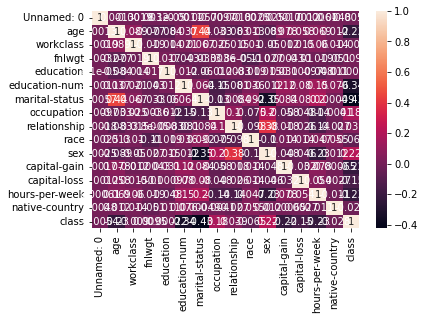

In [33]:
# Plot with Seaborn
sns.heatmap(corr_mat,annot=True)

In [35]:
# Value Counts
df['class'].value_counts()

1    24720
0     7841
Name: class, dtype: int64

<AxesSubplot:>

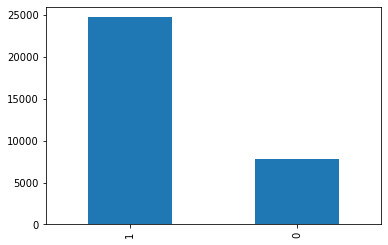

In [36]:
df['class'].value_counts().plot(kind="bar")

## Model Building

In [37]:
df2.columns

Index(['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education-num', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'class'],
      dtype='object')

In [38]:
df2.shape

(32561, 16)

In [39]:
df2.iloc[:,0:14].columns

Index(['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education-num', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week'],
      dtype='object')

In [40]:
df2.iloc[:,14].name

'native-country'

In [41]:
X = df2.iloc[:,0:14].values
y = df2.iloc[:,14].values

In [42]:
# Split dataset
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [43]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
print(x_train.shape)
print(y_train.shape)

(21815, 14)
(21815,)


### Using LogisticRegression

In [45]:
logit = LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression()

In [46]:
# Accuracy of our Model
logit.score(x_test,y_test)

0.9003350083752094

In [59]:
import joblib

In [60]:
salary_logit_model = open("salary_logit_model.pkl","wb")
joblib.dump(logit,salary_logit_model)

In [61]:
salary_logit_model.close()

### Using Naive Bayes

In [56]:
nv = MultinomialNB()
nv.fit(x_train,y_train)

MultinomialNB()

In [57]:
nv.score(x_test,y_test)

0.000744463056020845

In [62]:
salary_nv_model = open("salary_nv_model.pkl","wb")
joblib.dump(nv,salary_nv_model)

In [63]:
salary_nv_model.close()

### Using RandomForest

In [50]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=4)

In [51]:
rf.score(x_test,y_test)

0.9008933556672251

In [64]:
# Save Model
salary_rf_model = open("salary_rf_model.pkl","wb")
joblib.dump(rf,salary_rf_model)

In [65]:
salary_rf_model.close()

### Cross Validation

In [52]:
cv_scores = cross_val_score(LogisticRegression(),X,y,cv=10)

In [53]:
print(cv_scores)

[0.89560946 0.89588452 0.89588452 0.89588452 0.89588452 0.89588452
 0.89588452 0.89588452 0.89588452 0.89588452]


In [55]:
print(np.mean(cv_scores))

0.8958570144515798
